**IMPORT CSV**

In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/iklim/kelembaban/nc_to_csv/rh_satuan.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [4]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  54000 non-null  int64         
 1   time        54000 non-null  datetime64[ns]
 2   latitude    54000 non-null  float64       
 3   longitude   54000 non-null  float64       
 4   d2m         54000 non-null  float64       
 5   t2m         54000 non-null  float64       
 6   RH          54000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.9 MB
   Unnamed: 0       time  latitude  longitude        d2m        t2m         RH
0           0 2018-01-01      -7.0     106.00  23.864685  26.465942  86.993713
1           1 2018-01-01      -7.0     106.05  23.745544  26.282355  87.315948
2           2 2018-01-01      -7.0     106.10  23.626404  26.098767  87.638184
3           3 2018-01-01      -7.0     106.15  23.507263  25.915179  87.960

In [5]:
df_csv['month'] = df_csv['time'].dt.month

In [6]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [7]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

**CREATE GEOMETRY FROM SHP AND CSV**

In [8]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

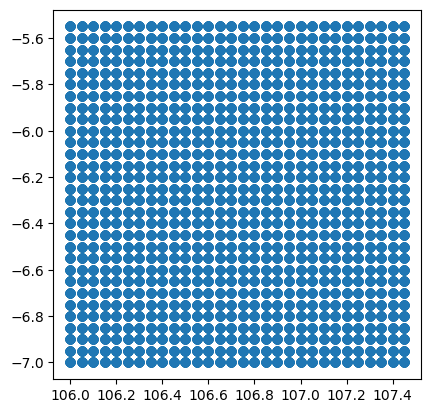

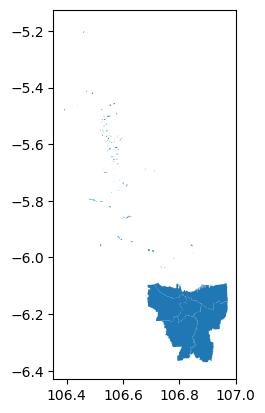

In [9]:
gdf_csv.plot()
gdf_shapefile.plot()

In [10]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'RH', 'KABKOT', 'geometry', 'time']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1440 entries, 406 to 53659
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  1440 non-null   float64       
 1   latitude   1440 non-null   float64       
 2   month      1440 non-null   int32         
 3   year       1440 non-null   int32         
 4   RH         1440 non-null   float64       
 5   KABKOT     1440 non-null   object        
 6   geometry   1440 non-null   geometry      
 7   time       1440 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 90.0+ KB


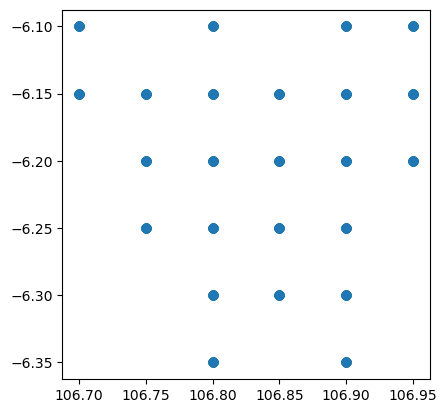

In [11]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [12]:
#input the columns to get the RH average/year
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month','year'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,KABKOT,month,year,geometry,longitude,latitude,RH,time
0,JAKARTA BARAT,1,2018,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,81.914160,2018-01-01
1,JAKARTA BARAT,1,2019,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,83.683022,2019-01-01
2,JAKARTA BARAT,1,2020,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,85.895006,2020-01-01
3,JAKARTA BARAT,1,2021,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,85.869056,2021-01-01
4,JAKARTA BARAT,1,2022,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,83.321066,2022-01-01


In [13]:
#download data to .csv format
dissolved_result.to_csv('rh_all_year.csv')

**SET FOR MAPPING**

In [14]:
# ubah per month
import pandas as pd

In [15]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [16]:
dissolved_result_df = dissolved_result_df.sort_values(by=['year', 'KABKOT', 'month'])

In [17]:
dissolved_result_df

,KABKOT,month,year,longitude,latitude,RH,time
0,JAKARTA BARAT,1,2018,106.750000,-6.158333,81.914160,2018-01-01
5,JAKARTA BARAT,2,2018,106.750000,-6.158333,85.607633,2018-02-01
10,JAKARTA BARAT,3,2018,106.750000,-6.158333,83.613396,2018-03-01
15,JAKARTA BARAT,4,2018,106.750000,-6.158333,83.669416,2018-04-01
20,JAKARTA BARAT,5,2018,106.750000,-6.158333,80.346159,2018-05-01
...,...,...,...,...,...,...,...
279,JAKARTA UTARA,8,2022,106.891667,-6.125000,79.779854,2022-08-01
284,JAKARTA UTARA,9,2022,106.891667,-6.125000,80.356575,2022-09-01
289,JAKARTA UTARA,10,2022,106.891667,-6.125000,82.717352,2022-10-01
294,JAKARTA UTARA,11,2022,106.891667,-6.125000,82.045862,2022-11-01


In [ ]:
dissolved_result_df

,KABKOT,month,year,longitude,latitude,RH,time
0,JAKARTA BARAT,1,2018,106.750000,-6.158333,81.914160,2018-01-01
5,JAKARTA BARAT,2,2018,106.750000,-6.158333,85.607633,2018-02-01
10,JAKARTA BARAT,3,2018,106.750000,-6.158333,83.613396,2018-03-01
15,JAKARTA BARAT,4,2018,106.750000,-6.158333,83.669416,2018-04-01
20,JAKARTA BARAT,5,2018,106.750000,-6.158333,80.346159,2018-05-01
...,...,...,...,...,...,...,...
279,JAKARTA UTARA,8,2022,106.891667,-6.125000,79.779854,2022-08-01
284,JAKARTA UTARA,9,2022,106.891667,-6.125000,80.356575,2022-09-01
289,JAKARTA UTARA,10,2022,106.891667,-6.125000,82.717352,2022-10-01
294,JAKARTA UTARA,11,2022,106.891667,-6.125000,82.045862,2022-11-01


In [18]:
#download data to .csv format
dissolved_result_df.to_csv('rh_kabkot_year.csv')

In [19]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'year', 'longitude', 'latitude',
       'RH', 'time'],
      dtype='object')


**MAPPING**

In [20]:
import calendar
import matplotlib.pyplot as plt

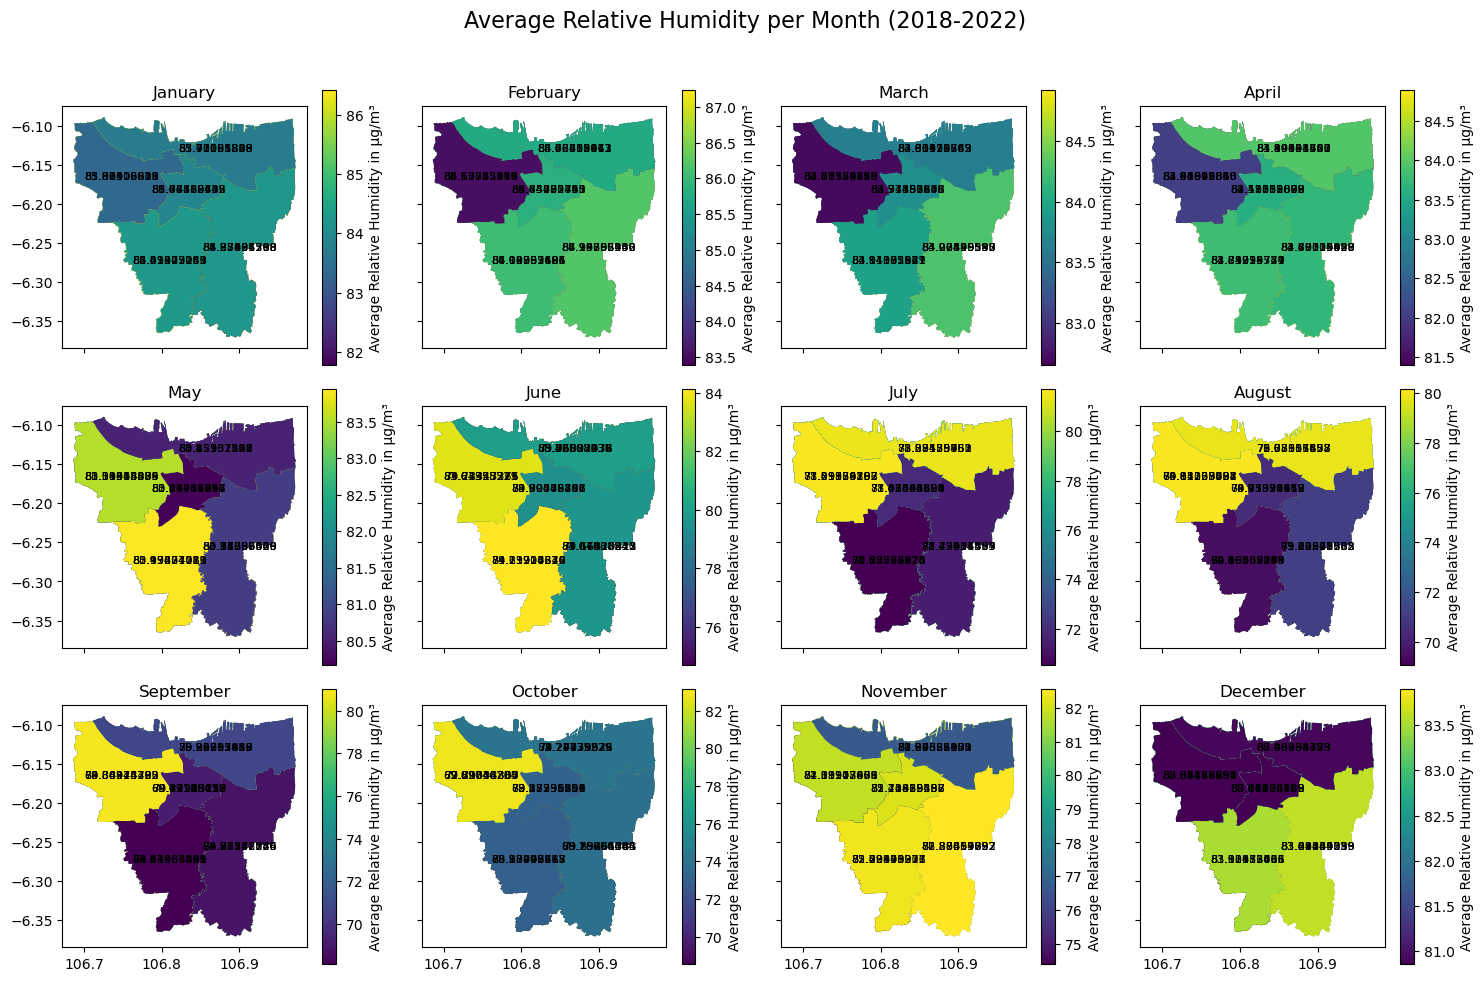

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average Relative Humidity per Month (2018-2022)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="RH", legend=True, legend_kwds={"label": "Average Relative Humidity in µg/m³"})

    # Annotate each polygon with average RH value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['RH']:.8f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('turbo')
plt.set_cmap(cmap)

**GRAPHS**

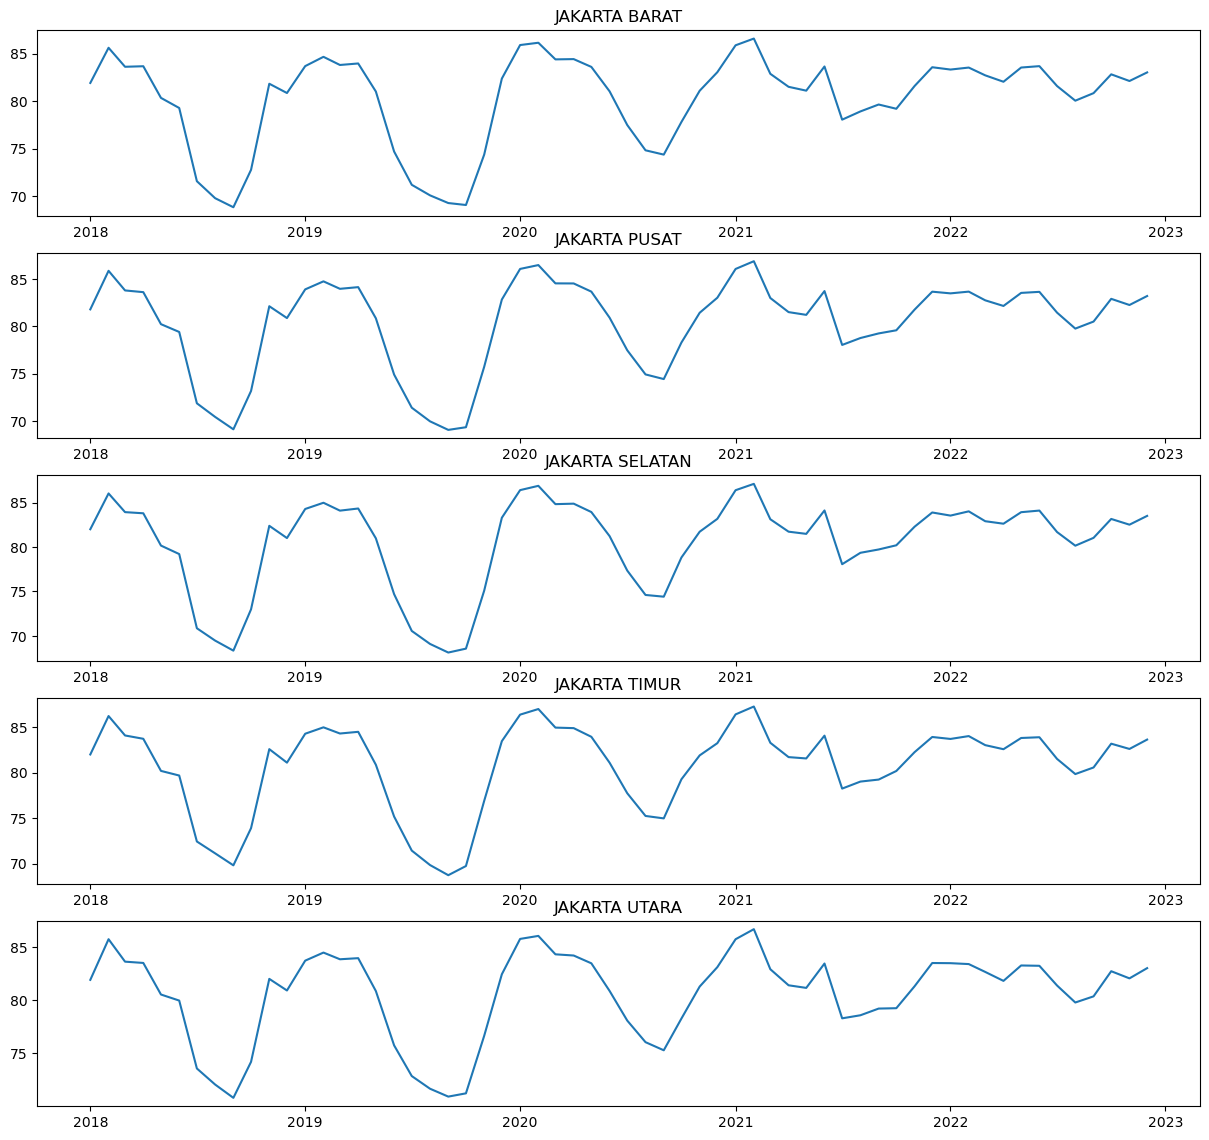

In [22]:
# There are 5 graphs, each city has 1 graph which shows time series from Jan 2018 to Dec 2022
fig  = plt.figure(figsize=(15,40))
cities = list(dissolved_result_df['KABKOT'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')

# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['KABKOT'] == city]
    
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['RH'])
    plt.title(city)
    #ax.set_title(f'{city}')